In [269]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns

# suppress warning
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

#import seaborn as sns
#sns.set()

%matplotlib inline

## Data Cleaning

In [270]:
# Get the current directory
current_directory = os.getcwd()

# Define the path to the data folder
data_folder = os.path.join(current_directory, 'data')

# List all files in the data folder
files = os.listdir(data_folder)


# Read each CSV file in the data folder
for file in files:
    if file.endswith('listings2024_03.csv'):
        print("df2024_03")
        file_path1 = os.path.join(data_folder, file)
        df2024_03 = pd.read_csv(file_path1)
    elif file.endswith('listings2024_02.csv'):
        print("df2024_02")
        file_path2 = os.path.join(data_folder, file)
        df2024_02 = pd.read_csv(file_path2)
    elif file.endswith("listings2024_01.csv"):
        print("df2024_01")
        file_path3 = os.path.join(data_folder, file)
        df2024_01 = pd.read_csv(file_path3)
    elif file.endswith("listings2023_12.csv"):
        print("df2023_12")
        file_path4 = os.path.join(data_folder, file)
        df2023_12 = pd.read_csv(file_path4)
    elif file.endswith("listings2023_11.csv"):
        print("df2023_11")
        file_path5 = os.path.join(data_folder, file)
        df2023_11 = pd.read_csv(file_path5)
    elif file.endswith("listings2023_10.csv"):
        print("df2023_10")
        file_path6 = os.path.join(data_folder, file)
        df2023_10 = pd.read_csv(file_path6)
    elif file.endswith("listings2023_09.csv"):
        print("df2023_09")
        file_path7 = os.path.join(data_folder, file)
        df2023_09 = pd.read_csv(file_path7)
    elif file.endswith("listings2023_08.csv"):
        print("df2023_08")
        file_path8 = os.path.join(data_folder, file)
        df2023_08 = pd.read_csv(file_path8)
    elif file.endswith("listings2023_07.csv"):
        print("df2023_07")
        file_path9 = os.path.join(data_folder, file)
        df2023_07 = pd.read_csv(file_path9)        
    elif file.endswith("listings2023_06.csv"):
        print("df2023_06")
        file_path10 = os.path.join(data_folder, file)
        df2023_06 = pd.read_csv(file_path10)        
    elif file.endswith("listings2023_05.csv"):
        print("df2023_05")
        file_path11 = os.path.join(data_folder, file)
        df2023_05 = pd.read_csv(file_path11)
    elif file.endswith("listings2023_04.csv"):
        print("df2023_04")
        file_path12 = os.path.join(data_folder, file)
        df2023_04 = pd.read_csv(file_path12)
  
    


df2023_08
df2024_01
df2023_09
df2024_02
df2024_03
df2023_07
df2023_12
df2023_06
df2023_10
df2023_04
df2023_05
df2023_11


In [271]:
# List of DataFrames
dataframes = [
    df2023_08, df2024_01, df2023_09, df2024_02, df2024_03,
    df2023_07, df2023_12, df2023_06, df2023_10, df2023_04,
    df2023_05, df2023_11
]

# Dictionary to hold the names and lengths
df_lengths = {}

# Iterate through the DataFrames and print their lengths
for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_lengths[month_year] = len(df)

# Print the lengths
for name, length in df_lengths.items():
    print(f"Length of {name}: {length}")

Length of df2023_04: 43582
Length of df2023_05: 39719
Length of df2023_06: 39453
Length of df2023_07: 39202
Length of df2023_08: 39319
Length of df2023_09: 43729
Length of df2023_10: 39627
Length of df2023_11: 43566
Length of df2023_12: 38792
Length of df2024_01: 43241
Length of df2024_02: 43303
Length of df2024_03: 39160


In [272]:
df_missing_values = {}

for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_missing_values[month_year] = df.isnull().sum()

for name, missing_counts in df_missing_values.items():
    print(f"Missing values in {name}:")
    print(missing_counts)
    print() 

Missing values in df2023_04:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10603
reviews_per_month                 10603
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43582
dtype: int64

Missing values in df2023_05:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbou

### Add Zipcode

In [273]:
NYCzipcode = gpd.read_file('./ZIPCODE/ZIP_CODE_040114.shp')

In [274]:
df2024_01_gdf = gpd.GeoDataFrame(
    df2024_01,
    geometry=gpd.points_from_xy(df2024_01.longitude, df2024_01.latitude),
    crs="EPSG:4326"
)

In [275]:
# 2024_1 with ziocode not all data.
df2024_01_gdf = df2024_01_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2024_01_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202401_with_zip = df2024_01.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [276]:
#Removing the Duplicates if any
airbnb202401_with_zip.duplicated().sum()
airbnb202401_with_zip.drop_duplicates(inplace=True)
len(airbnb202401_with_zip)

39719

### Crime Data

In [277]:
file_path_crimes = os.path.join(data_folder, 'NYPD_Hate_Crimes_20240305.csv')
crimes = pd.read_csv(file_path_crimes)
crimes.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,202206012204617,2022,3,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1,202006012153917,2020,2,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2,202306012418117,2023,5,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3,202306012285217,2023,4,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
4,202306012358417,2023,4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


## Descriptive Analysis

In [278]:
crimes.dtypes

Full Complaint ID                  int64
Complaint Year Number              int64
Month Number                       int64
Record Create Date                object
Complaint Precinct Code            int64
Patrol Borough Name               object
County                            object
Law Code Category Description     object
Offense Description               object
PD Code Description               object
Bias Motive Description           object
Offense Category                  object
Arrest Date                      float64
Arrest Id                         object
dtype: object

In [279]:
crimes.County.unique()

array(['KINGS', 'NEW YORK', 'QUEENS', 'BRONX', 'RICHMOND'], dtype=object)

In [280]:
airbnb202401_with_zip.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [281]:
# Kings= Brooklyn, RichMond= Staten Island
county_to_borough = {
    'KINGS': 'Brooklyn',
    'NEW YORK': 'Manhattan',
    'QUEENS': 'Queens',
    'BRONX': 'Bronx',
    'RICHMOND': 'Staten Island'
}

# Replace the county names with borough names in the 'County' column
crimes['County'] = crimes['County'].replace(county_to_borough)

In [282]:
crimes.County.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [283]:
crimes.shape

(2406, 14)

### Rental Income

In [284]:
rental = pd.read_csv("DOF_Condominium_Comparable_Rental_Income_in_NYC_20231211.csv")

In [285]:
rental_gross_income = rental.groupby(['Neighborhood']).agg({'Gross Income per SqFt': 'mean'})
rental_gross_income.sort_index(inplace=True)
rental_gross_income.head()

,Gross Income per SqFt
Neighborhood,
15TH Q QUEENS,29.626667
2999,12.600000
30TH Q BROOKLYN,20.820000
50TH Q BROOKLYN,24.882500
5TH Q BROOKLYN,26.815000


In [286]:
airbnb_neighbor_price = df2024_01.groupby(['neighbourhood']).agg({'price': 'mean'})
airbnb_neighbor_price.head()

,price
neighbourhood,
Allerton,117.904762
Arden Heights,115.000000
Arrochar,137.666667
Arverne,220.280000
Astoria,117.700000


In [287]:
airbnb_neighbor_price.index = airbnb_neighbor_price.index.str.upper()
filtered_rental_gross_income = rental_gross_income[rental_gross_income.index.isin(airbnb_neighbor_price.index)]
filtered_rental_gross_income.head()

,Gross Income per SqFt
Neighborhood,
ARVERNE,29.905000
ASTORIA,27.833360
BATH BEACH,17.751803
BAY RIDGE,20.267846
BAYSIDE,23.749327


In [288]:
Rental_marketvalue = rental.groupby(['Neighborhood']).agg({'Market Value per SqFt': 'mean'})
filtered_Rental_marketvalue = Rental_marketvalue[Rental_marketvalue.index.isin(airbnb_neighbor_price.index)]
filtered_Rental_marketvalue.head()

,Market Value per SqFt
Neighborhood,
ARVERNE,137.250000
ASTORIA,143.843281
BATH BEACH,73.815082
BAY RIDGE,90.857385
BAYSIDE,120.646635


## Exploratory Analysis

(目前只做了202401 后面需要可以直接copy代码改数)

In [289]:
#drop unnecessary columns
df2024_01.drop(['name','id','host_name','last_review','number_of_reviews_ltm', 'license'], axis=1, inplace=True)
df2024_01.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [290]:
#select the number columns
numeric_df = df2024_01.select_dtypes(include=[np.number])


Get Correlation between different variables

<Axes: >

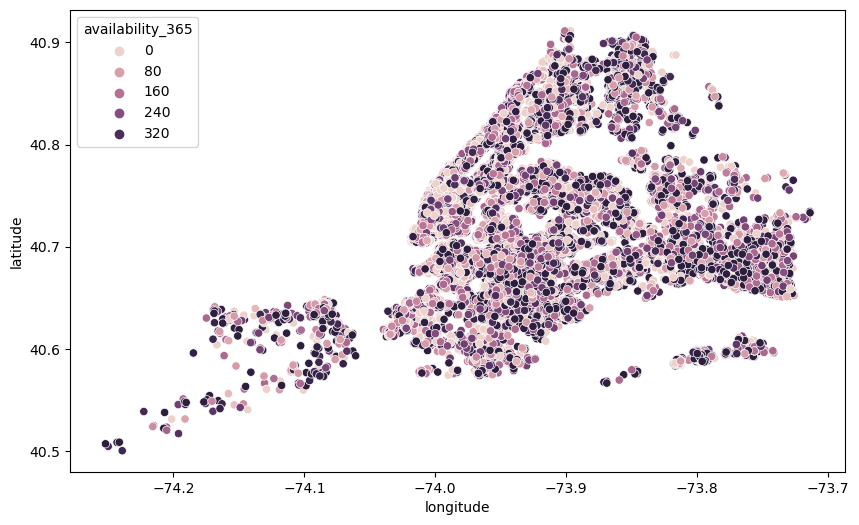

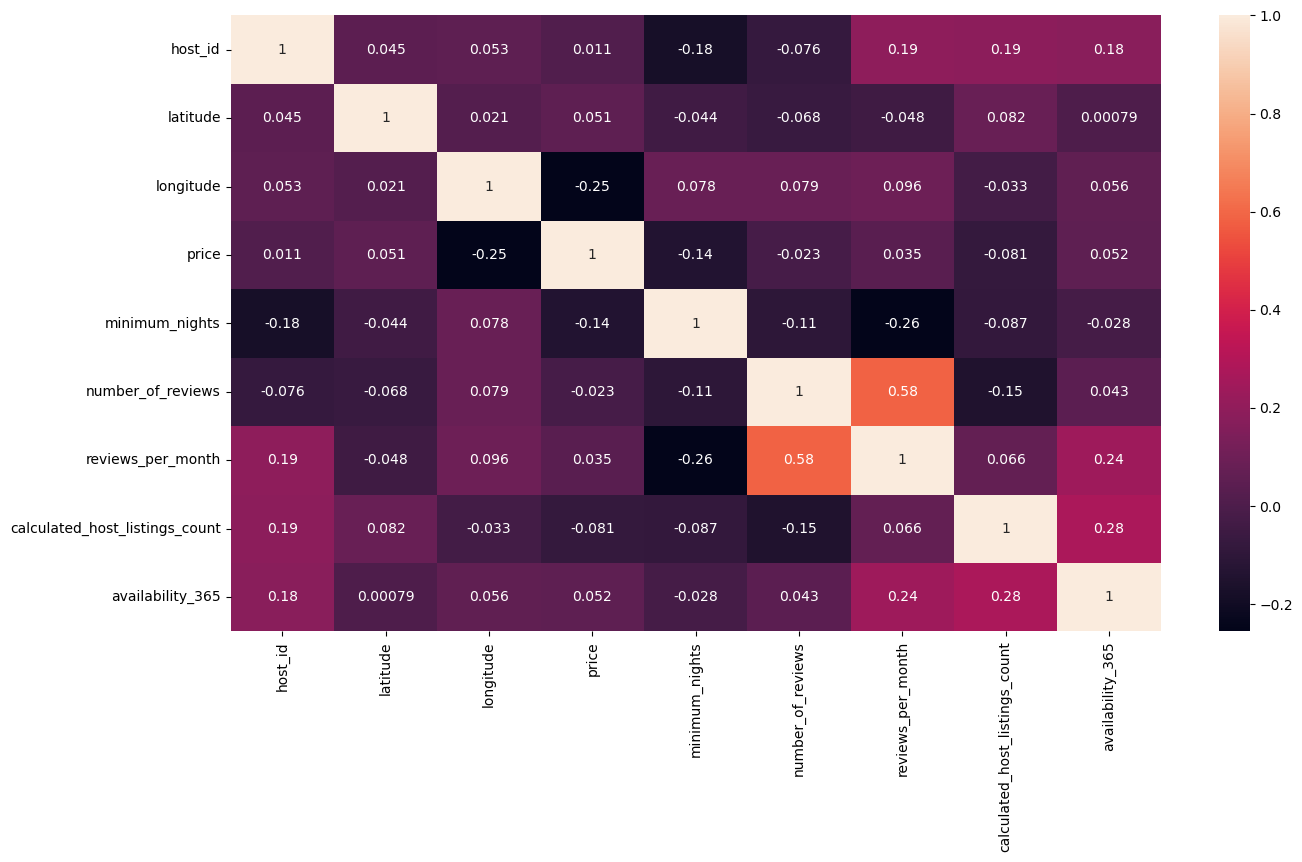

In [291]:
corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

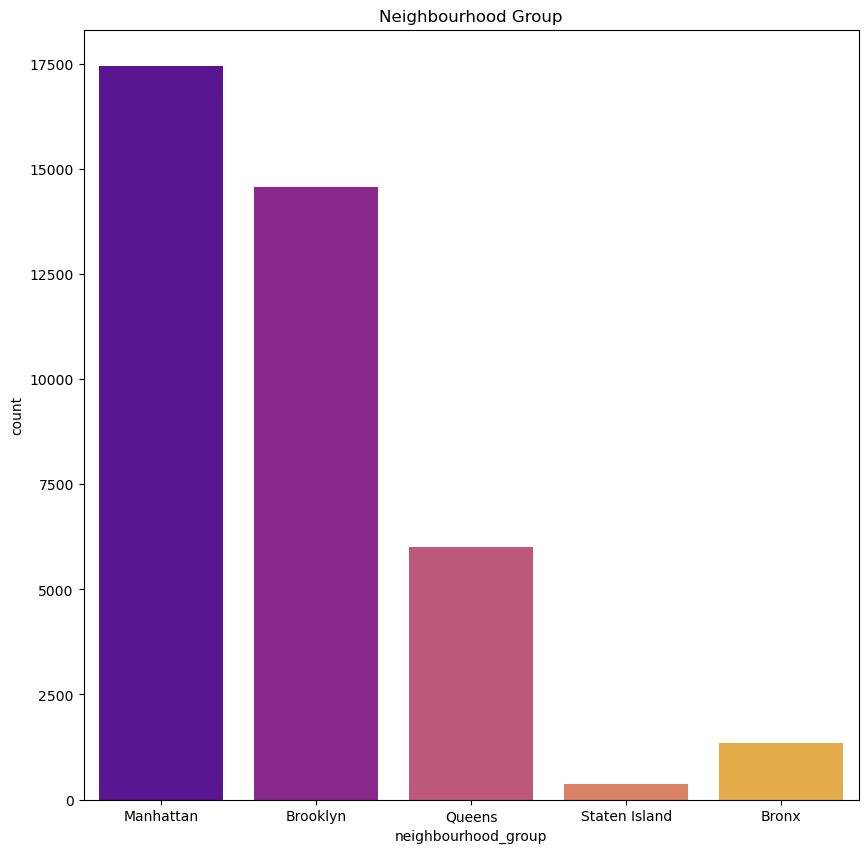

In [292]:
sns.countplot(x='neighbourhood_group', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

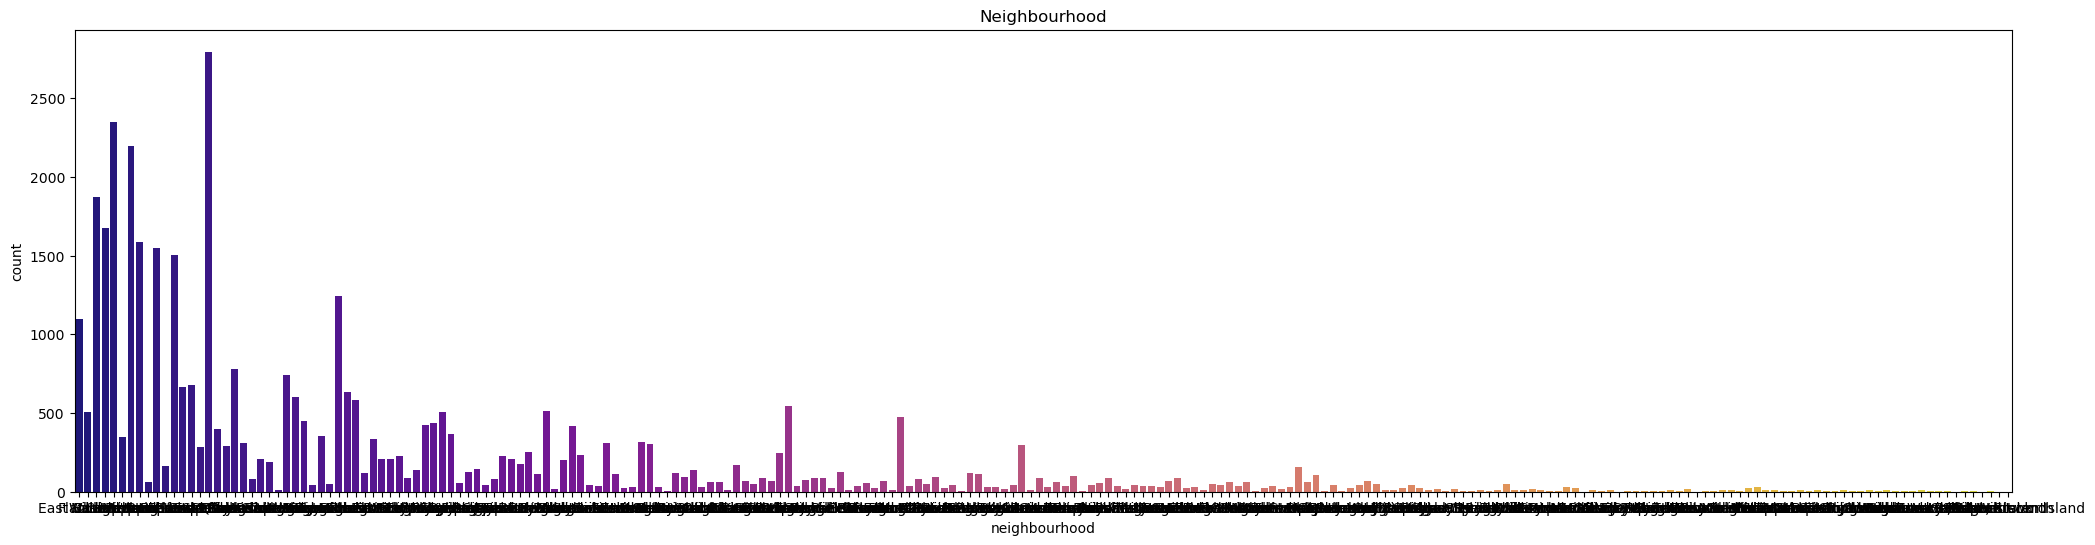

In [293]:
sns.countplot(x='neighbourhood', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')


In [294]:
df2024_01['neighbourhood'] = df2024_01['neighbourhood'].astype(str)

Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

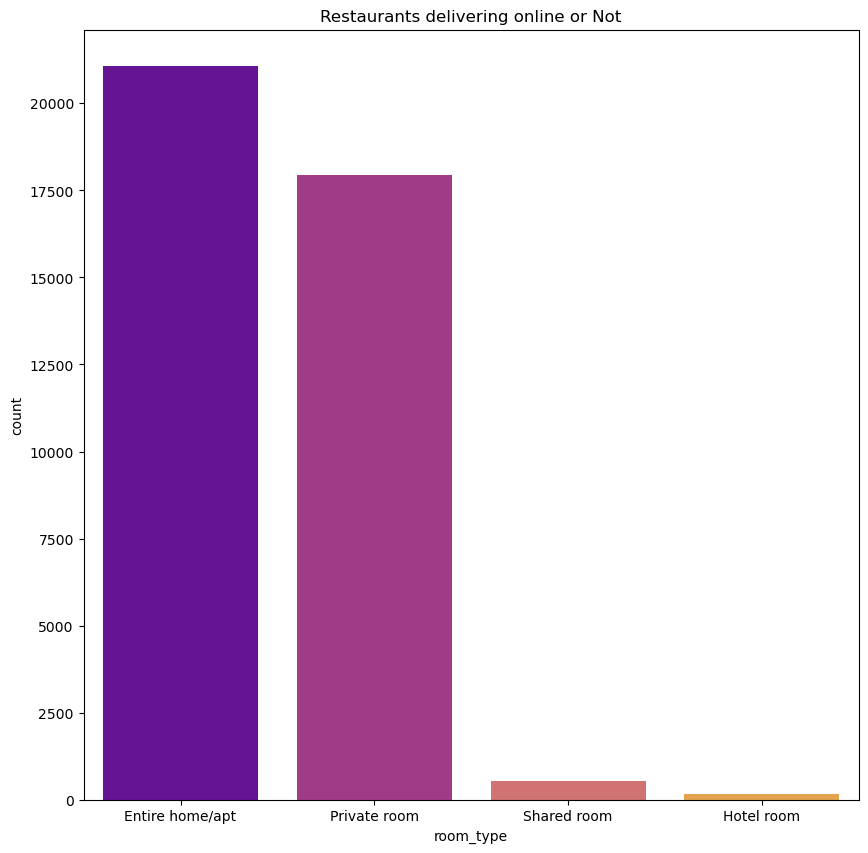

In [295]:
#Restaurants delivering Online or not
sns.countplot(x='room_type', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Relation between neighbourgroup and Availability of Room¶


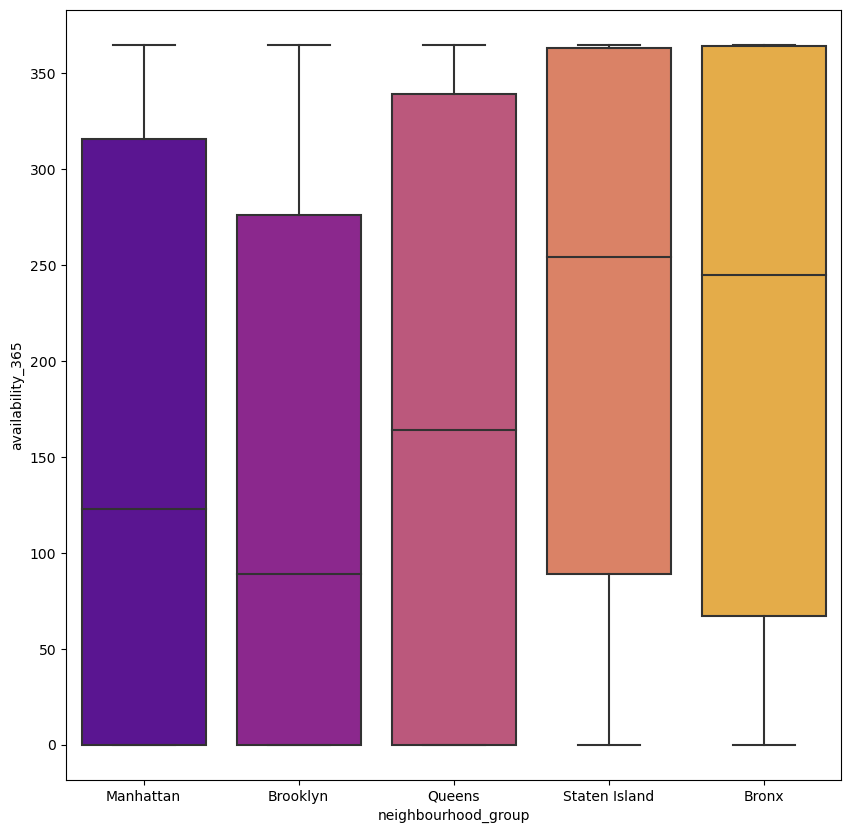

In [296]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df2024_01, x='neighbourhood_group',y='availability_365',palette='plasma')

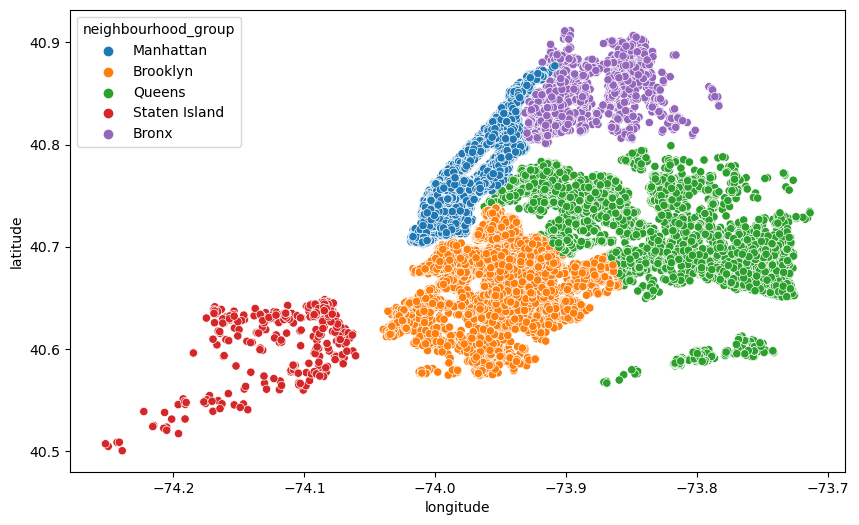

In [297]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['neighbourhood_group'])
plt.ioff()

In [298]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['availability_365'])
plt.ioff()

In [299]:
df2024_01
#发现availability_365数据有问题

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5448955,Manhattan,East Village,40.731790,-73.986790,Entire home/apt,NaN,30,15,0.20,1,0
1,83422715,Brooklyn,Flatbush,40.653750,-73.955020,Entire home/apt,289.0,30,0,NaN,1,365
2,43719554,Manhattan,Harlem,40.824400,-73.945980,Private room,NaN,30,0,NaN,1,0
3,5925222,Brooklyn,Bushwick,40.690200,-73.917820,Entire home/apt,NaN,30,1,0.01,1,0
4,268631641,Manhattan,East Village,40.723850,-73.976950,Private room,NaN,30,1,0.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39714,3237504,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30,56,0.48,1,0
39715,304317395,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30,60,2.09,1,0
39716,51678353,Manhattan,West Village,40.733170,-74.006080,Private room,NaN,30,2,0.02,1,0
39717,163083101,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,30,7,0.91,1,363


### Time Series

### PCA...